<a href="https://colab.research.google.com/github/mickx79/Telecom-X-2da-parte/blob/main/Telecom__X_2da_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - Importando el DataFrame

In [121]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mickx79/Telecom-X-2da-parte/refs/heads/main/telecomx.csv'
df = pd.read_csv(url)

df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

# Eliminando columnas irrelevantes

In [122]:
df.drop('customerID', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


# Encoding

In [123]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [124]:
# para crear uno nuevo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.186667,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,1.996667,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.463333,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.266667,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.796667,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.838333,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.836667,True,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.676667,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.261667,False,True,True,True,False,...,True,True,False,True,False,True,False,False,False,True


# Verificación de la Proporción de Cancelación (Churn)

In [125]:
df_encoded['Churn_Yes'].value_counts(normalize=True)*100

,proportion
Churn_Yes,
False,73.463013
True,26.536987


In [126]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Charges.Monthly                        7043 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Cuentas_Diarias                        7043 non-null   float64
 5   Churn_Yes                              7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [127]:
df_encoded = df_encoded[df_encoded['Charges.Total'].notna()]


# Balanceo

In [128]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [129]:
X= df_encoded.drop('Churn_Yes', axis=1)
y= df_encoded['Churn_Yes']

In [130]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [131]:
y_resampled.value_counts()

,count
Churn_Yes,
False,5163
True,5163


# Analisis de correlacion

In [132]:
corr = df_encoded.corr()

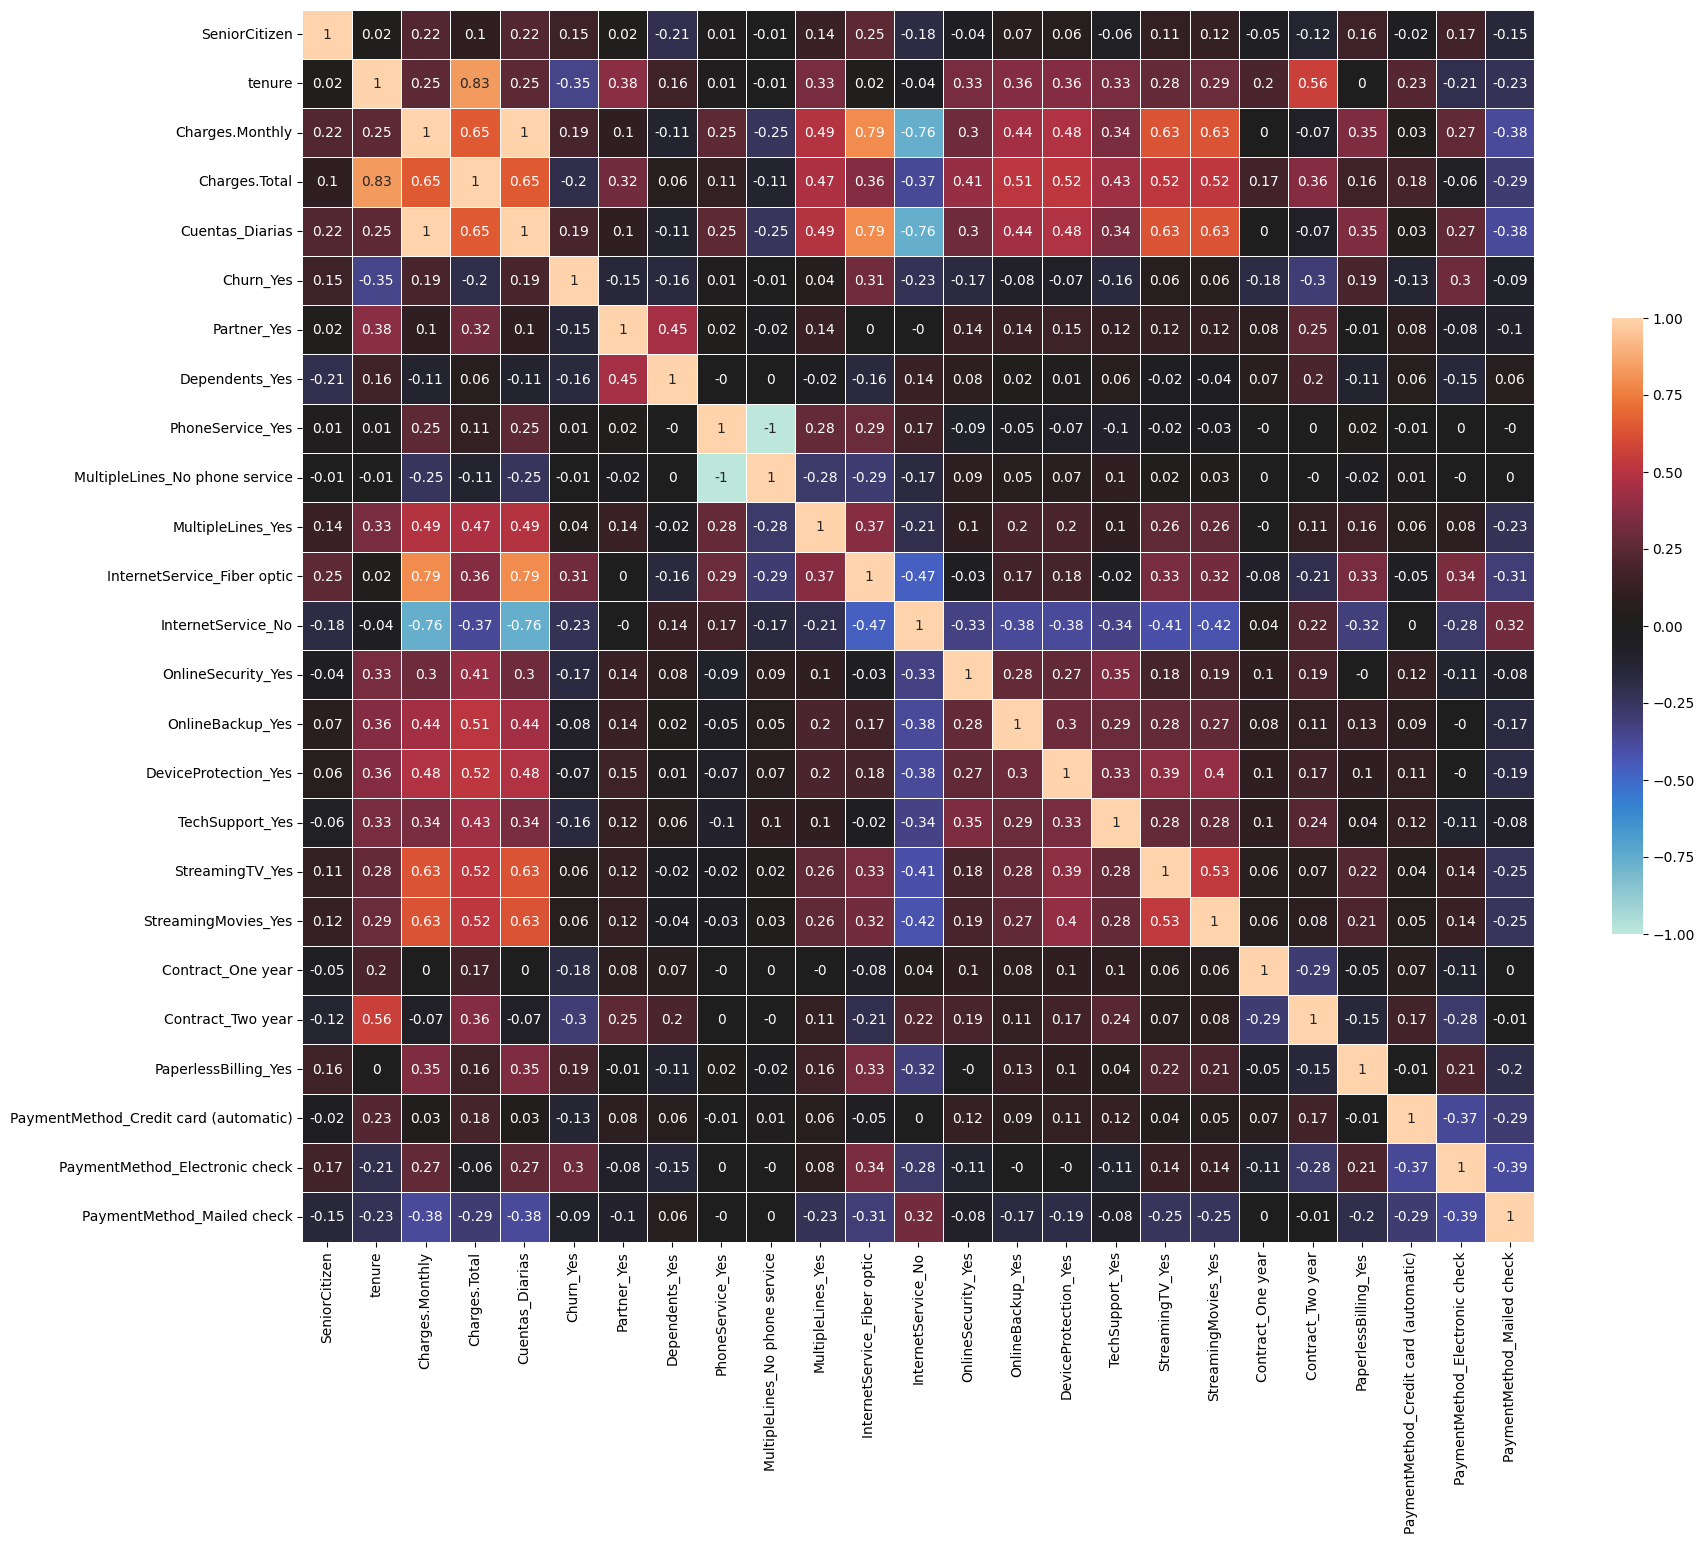

In [133]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

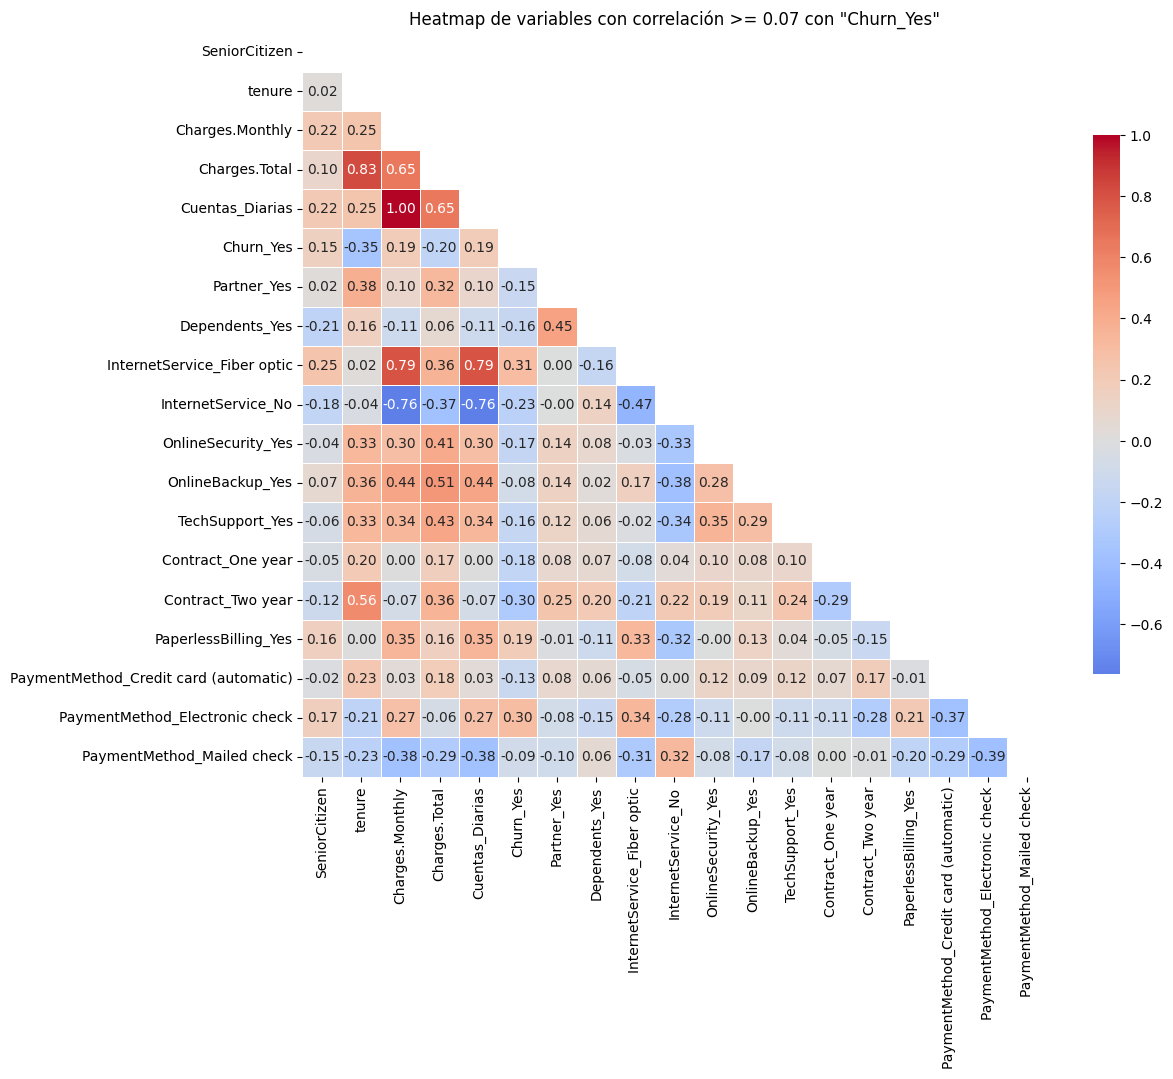

In [134]:
# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.07

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

# Analisis de multicolinearidad

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [136]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
3,Charges.Monthly,inf
8,PhoneService_Yes,inf
5,Cuentas_Diarias,inf
9,MultipleLines_No phone service,inf
11,InternetService_Fiber optic,148.475745
12,InternetService_No,104.204981
18,StreamingMovies_Yes,24.151890
17,StreamingTV_Yes,24.076364
4,Charges.Total,10.809451
2,tenure,7.584388


In [137]:
# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variables com multicolinearidad perfecta (VIF = inf) ======
cols_to_drop = [
    "PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundancias fuertes entre variables numéricas ======
# Como 'Cuentas_Diarias' y 'Charges.Total' son derivados de 'Monthly' y 'tenure', mantemos solo una
X_filtered.drop(columns=["Cuentas_Diarias"], inplace=True)

# ====== Etapa 4: Remover redundancia entre dummies de la misma variable categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,35.573822
3,Charges.Monthly,18.167300
4,Charges.Total,10.705087
2,tenure,7.548603
8,InternetService_Fiber optic,6.996398
16,Contract_Two year,2.531953
13,StreamingTV_Yes,2.188437
14,StreamingMovies_Yes,2.187607
19,PaymentMethod_Electronic check,1.966848
20,PaymentMethod_Mailed check,1.847227


In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [139]:
X_final = X_filtered.drop(columns=["Charges.Total"])

In [140]:
# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,28.740855
3,Charges.Monthly,17.280688
7,InternetService_Fiber optic,6.934917
2,tenure,2.824743
15,Contract_Two year,2.521014
12,StreamingTV_Yes,2.166545
13,StreamingMovies_Yes,2.163622
18,PaymentMethod_Electronic check,1.963577
19,PaymentMethod_Mailed check,1.825102
11,TechSupport_Yes,1.711993


## Visualización de la relación entre variables y la cancelación

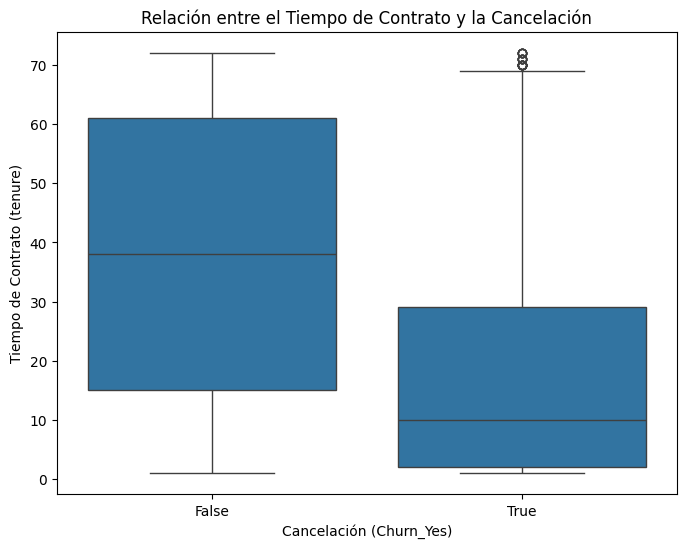

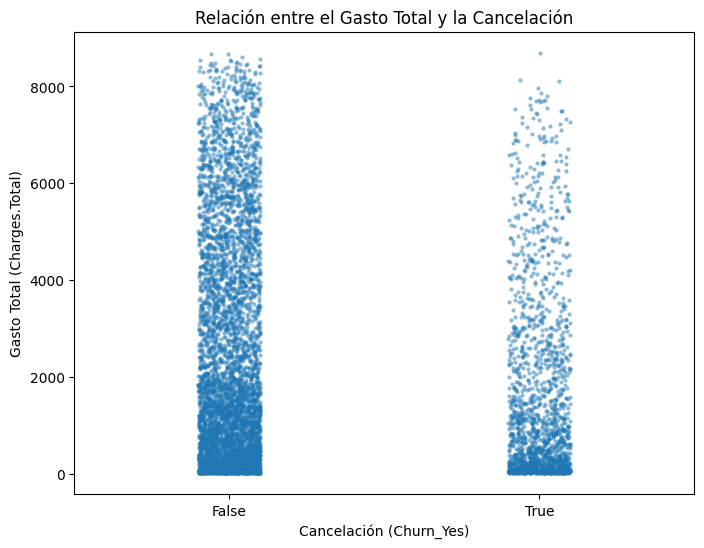

In [55]:
# Boxplot para 'tenure' vs 'Churn_Yes'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='tenure', data=df_encoded)
plt.title('Relación entre el Tiempo de Contrato y la Cancelación')
plt.xlabel('Cancelación (Churn_Yes)')
plt.ylabel('Tiempo de Contrato (tenure)')
plt.show()

# Scatter plot para 'Charges.Total' vs 'Churn_Yes'
# Como Churn_Yes es binario, usaremos swarmplot o stripplot para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.stripplot(x='Churn_Yes', y='Charges.Total', data=df_encoded, size=3, alpha=0.5)
plt.title('Relación entre el Gasto Total y la Cancelación')
plt.xlabel('Cancelación (Churn_Yes)')
plt.ylabel('Gasto Total (Charges.Total)')
plt.show()

#  Modelos predictivos

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [145]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7488151658767772
ROC AUC: 0.8450745636596091
Matriz de Confusión:
 [[1127  422]
 [ 108  453]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [146]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7729857819905214
ROC AUC: 0.8211271949357242
Matriz de Confusión:
 [[1299  250]
 [ 229  332]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1549
        True       0.57      0.59      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.71      2110
weighted avg       0.78      0.77      0.77      2110



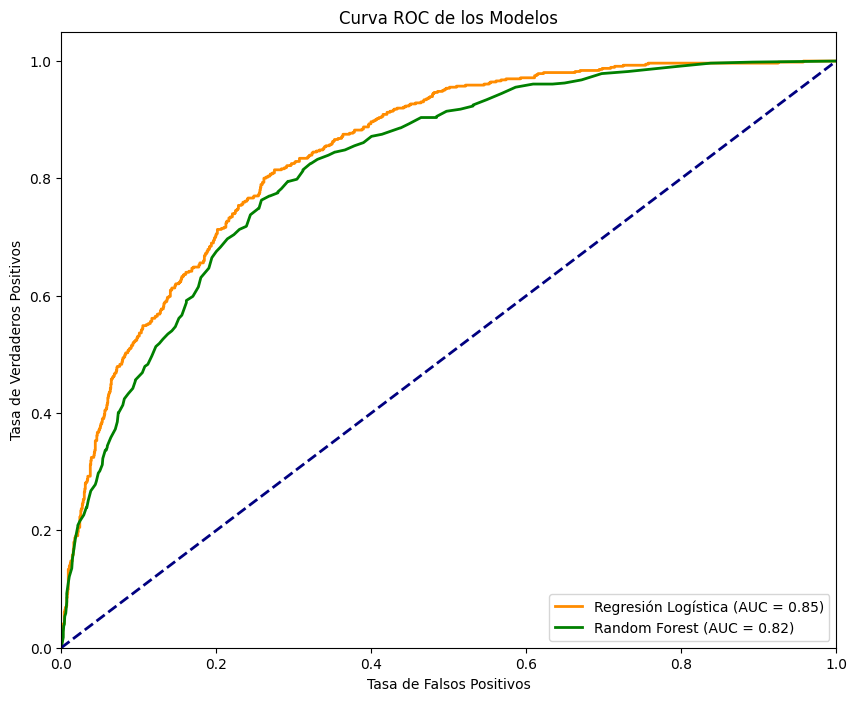

In [147]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC para Regresión Logística
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calcular la curva ROC para Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de los Modelos')
plt.legend(loc="lower right")
plt.show()

# **CONCLUSION**

# Informe Detallado: Factores de Influencia en la Cancelación de Clientes y Estrategias de Retención

Este informe presenta un análisis de los factores que más influyen en la cancelación (Churn) de clientes, basado en el conjunto de datos proporcionado y los modelos predictivos desarrollados.

## Factores Clave que Influyen en la Cancelación

Basándonos en el análisis de correlación, multicolinealidad y el rendimiento de los modelos de Regresión Logística y Random Forest, los siguientes factores se destacan como los más influyentes en la decisión de un cliente de cancelar el servicio:

*   **Tiempo de Contrato (tenure):** El análisis de correlación y el boxplot mostraron una correlación negativa significativa con la cancelación. Los clientes con menor tiempo de contrato (`tenure`) tienen una mayor probabilidad de cancelar. El boxplot evidenció que la mediana del tiempo de contrato es considerablemente menor para los clientes que cancelan en comparación con los que no cancelan.
*   **Tipo de Contrato:** Los tipos de contrato tienen un impacto importante. Los clientes con contratos mensuales (`Contract_Month-to-month` - aunque eliminada en el encoding con `drop_first=True`, su influencia se refleja en los otros tipos de contrato) tienen una mayor tasa de cancelación en comparación con aquellos con contratos de uno o dos años (`Contract_One year`, `Contract_Two year`). La correlación negativa con los contratos de largo plazo confirma esto.
*   **Servicio de Internet (InternetService_Fiber optic / InternetService_No):** El tipo de servicio de internet es un predictor fuerte. Los clientes con servicio de fibra óptica (`InternetService_Fiber optic`) muestran una correlación positiva con la cancelación, mientras que la ausencia de servicio de internet (`InternetService_No`) muestra una correlación negativa. Esto podría indicar problemas con la calidad o el costo del servicio de fibra óptica, o que los clientes sin internet tienen servicios más básicos y menos propensos a cambiar.
*   **Soporte Técnico en Línea (OnlineSecurity_Yes, TechSupport_Yes):** La presencia de servicios adicionales como seguridad en línea y soporte técnico muestra correlaciones negativas con la cancelación. Los clientes que utilizan estos servicios tienden a cancelar menos, lo que sugiere que sentirse protegidos y tener acceso a ayuda influye en la retención.
*   **Gasto Mensual (Charges.Monthly):** El gasto mensual muestra una correlación positiva con la cancelación, aunque menor que otros factores. Los clientes con facturas mensuales más altas podrían ser más propensos a cancelar, posiblemente debido a la percepción del valor del servicio o a la búsqueda de opciones más económicas.
*   **Método de Pago (PaymentMethod_Electronic check):** El método de pago electrónico (`PaymentMethod_Electronic check`) muestra una correlación positiva con la cancelación. Esto podría estar relacionado con la facilidad para cambiar de proveedor al usar este método, o con un perfil de cliente más propenso a la rotación que prefiere este método.

## Rendimiento del Modelo Predictivo

Se entrenaron dos modelos para predecir la cancelación: Regresión Logística y Random Forest.

*   **Regresión Logística:** Obtuvo un AUC de 0.85. Su matriz de confusión muestra que tiene una buena capacidad para identificar clientes que van a cancelar (recall de 0.81 para la clase True), aunque su precisión para esa clase es menor (0.52), lo que indica que también predice erróneamente que algunos clientes no cancelarán cuando sí lo hacen.
*   **Random Forest:** Obtuvo un AUC de 0.82. Tuvo una mejor precisión general (0.77) y una mayor precisión para la clase True (0.57) en comparación con la Regresión Logística, pero un recall menor (0.59) para la clase True.

Ambos modelos muestran un rendimiento razonable, siendo la Regresión Logística ligeramente superior en términos de AUC, lo que la hace potencialmente más útil para identificar clientes en riesgo.

## Estrategias de Retención Propuestas

Basándonos en los factores de influencia identificados, se proponen las siguientes estrategias de retención:

*   **Clientes con Contratos Mensuales y Bajo Tiempo de Contrato:** Ofrecer incentivos para cambiar a contratos de mayor duración, como descuentos o beneficios adicionales. Mejorar la experiencia del cliente en los primeros meses de servicio.
*   **Clientes con Servicio de Fibra Óptica:** Investigar las causas de la mayor tasa de cancelación en este segmento. Podría ser necesario mejorar la calidad del servicio, ofrecer soporte técnico proactivo, o revisar la estructura de precios.
*   **Promoción de Servicios Adicionales:** Destacar los beneficios de los servicios de seguridad en línea y soporte técnico. Ofrecer pruebas gratuitas o descuentos para fomentar su adopción, ya que aumentan la retención.
*   **Análisis de Facturas Mensuales Elevadas:** Identificar a los clientes con gastos mensuales altos y evaluar si están recibiendo el valor esperado. Ofrecer planes personalizados o revisar los costos.
*   **Clientes que pagan con Cheque Electrónico:** Monitorear a este grupo de clientes de cerca. Podría ser útil ofrecerles incentivos para utilizar otros métodos de pago o simplemente estar más atentos a sus niveles de satisfacción.
*   **Programas de Fidelización:** Implementar programas para recompensar a los clientes a largo plazo (`tenure` alto) para fortalecer su lealtad.

## Conclusión

La cancelación de clientes es un problema multifacético influenciado por el tiempo de contrato, el tipo de contrato, el servicio de internet, el uso de servicios adicionales, el gasto mensual y el método de pago. Los modelos predictivos desarrollados pueden ayudar a identificar a los clientes en riesgo. Al enfocarse en los factores de influencia clave y aplicar estrategias de retención dirigidas, la empresa puede mejorar significativamente la lealtad de sus clientes y reducir la tasa de cancelación.